## Load the dataset

In [1]:
import json

with open('data/weighted_genre.json') as input_file:
    wg_json = json.load(input_file)

In [2]:
import pandas as pd

wg_df = pd.DataFrame(wg_json).T
wg_df.head(5)

,young-adult,romance,fiction,contemporary,realistic-fiction,teen,coming-of-age,fantasy,dystopia,science-fiction,...,romanovs,new-adult-romance,womens,agriculture,sustainability,trains,wonder-woman,computer-science,rwanda,utopia
16827462,"22,752","14,714","12,425","7,839","2,537","1,335","1,165",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792775,"33,322","4,612","19,505",NaN,NaN,NaN,NaN,"16,141","13,952","11,551",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8812783,"26,507","3,340","13,850",NaN,NaN,NaN,NaN,"11,423","11,500","8,525",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41107568,NaN,NaN,"11,173","1,688",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6171458,"28,081","3,701","14,806",NaN,NaN,NaN,NaN,"12,384","12,042","9,075",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of the data set: 9374x455

In [3]:
tags_df = pd.read_csv('data/tagdl.csv')

## Data Cleaning

In [4]:
def fix_numbers(num):
    if isinstance(num, str):
        num = num.replace(',','')
        return int(num)
    else:
        return 0

In [5]:
wg_df = wg_df.applymap(fix_numbers)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wg_df_scaled = pd.DataFrame(scaler.fit_transform(wg_df.T)).T

In [7]:
wg_df_scaled.columns = wg_df.columns
wg_df_scaled.index = wg_df.index
wg_df_scaled.head(5)

,young-adult,romance,fiction,contemporary,realistic-fiction,teen,coming-of-age,fantasy,dystopia,science-fiction,...,romanovs,new-adult-romance,womens,agriculture,sustainability,trains,wonder-woman,computer-science,rwanda,utopia
16827462,1.0,0.646712,0.546106,0.344541,0.111507,0.058676,0.051204,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2792775,1.0,0.138407,0.585349,0.000000,0.000000,0.000000,0.000000,0.484395,0.418702,0.346648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8812783,1.0,0.126004,0.522503,0.000000,0.000000,0.000000,0.000000,0.430943,0.433848,0.321613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41107568,0.0,0.000000,1.000000,0.151078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6171458,1.0,0.131797,0.527260,0.000000,0.000000,0.000000,0.000000,0.441010,0.428831,0.323172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def make_binary(num):
    if num > 0.5:
        return 1
    else:
        return 0

In [9]:
wg_df_final = wg_df_scaled.applymap(make_binary)
wg_df_final.head(5)

,young-adult,romance,fiction,contemporary,realistic-fiction,teen,coming-of-age,fantasy,dystopia,science-fiction,...,romanovs,new-adult-romance,womens,agriculture,sustainability,trains,wonder-woman,computer-science,rwanda,utopia
16827462,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2792775,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8812783,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41107568,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6171458,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
wg_df_final[wg_df_final.sum(axis = 1) == 0]

,young-adult,romance,fiction,contemporary,realistic-fiction,teen,coming-of-age,fantasy,dystopia,science-fiction,...,romanovs,new-adult-romance,womens,agriculture,sustainability,trains,wonder-woman,computer-science,rwanda,utopia
52959357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2247074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40159220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17054802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56065453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51979220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring Data

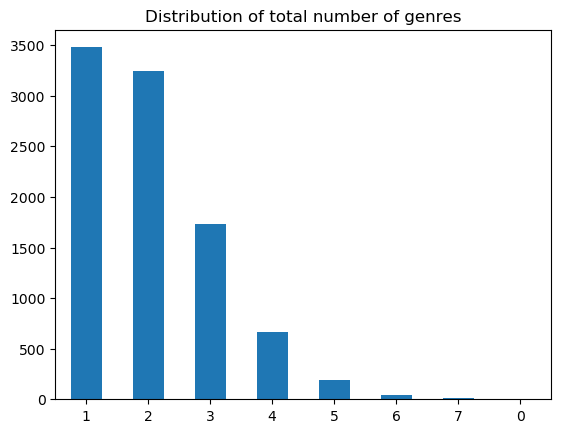

In [11]:
from matplotlib import pyplot as plt

wg_df_final.sum(axis=1).value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Distribution of total number of genres')
plt.xlabel("")
plt.show()

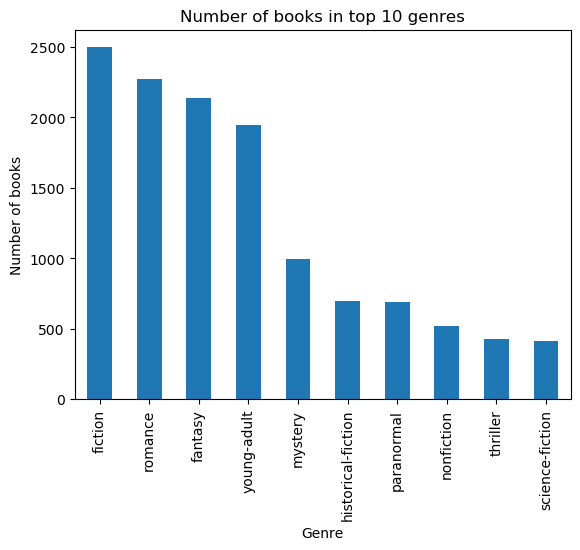

In [17]:
wg_df_final.sum(axis=0).sort_values(ascending = False)[0:10].plot(kind = "bar")
plt.title("Number of books in top 10 genres")
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.show()

In [13]:
pop_df = wg_df_final[['young-adult','romance','fiction','fantasy']] 
pop_df.head(5)

,young-adult,romance,fiction,fantasy
16827462,1,1,1,0
2792775,1,0,1,0
8812783,1,0,1,0
41107568,0,0,1,0
6171458,1,0,1,0


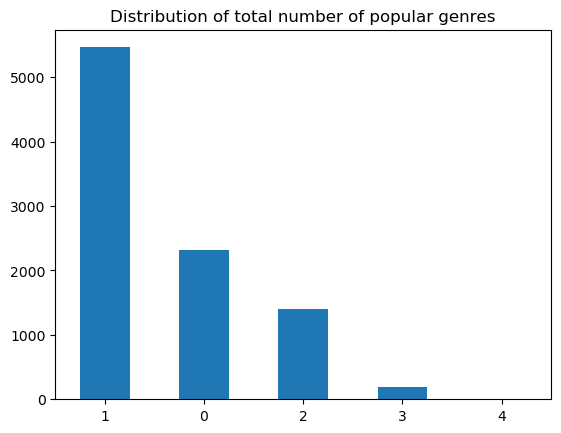

In [14]:
pop_df.sum(axis = 1).value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Distribution of total number of popular genres')
plt.show()

## Merging Data

In [15]:
tags_df.head(5)

,tag,item_id,score
0,samurai,16416771,0.000240
1,samurai,23756807,0.000189
2,samurai,24248331,0.000008
3,samurai,16646156,-0.000001
4,samurai,21856269,-0.000001


In [16]:
tags_df = pd.pivot(tags_df, index ='item_id', columns = 'tag', values = 'score').reset_index()
tags_df.head(5)

tag,item_id,18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,2000s,...,women's fiction,work,workplace,world war i,world war ii,writers,writing,young adult,youth,zombies
0,115,0.000441,0.000259,0.000159,-0.000112,0.000384,-8.155405e-05,0.000332,0.000805,0.019504,...,0.088370,-0.000149,4.234910e-04,0.000065,0.000219,0.579350,0.000434,0.862401,0.995364,-0.000051
1,387,0.000654,0.000313,0.000152,0.000059,0.066584,3.615022e-05,0.000003,0.000256,0.003805,...,0.241295,0.133587,2.261996e-05,0.001527,0.000058,0.819140,0.000564,0.260314,0.029153,0.000096
2,423,0.000428,-0.000035,0.000469,0.000597,0.000225,2.044311e-01,0.176913,0.000316,0.005482,...,0.149466,0.000097,6.660819e-05,0.340431,0.000439,0.805663,0.000345,0.199621,-0.000037,0.000985
3,434,0.000377,0.000279,0.130165,0.759774,0.000685,-3.172681e-03,0.755905,0.000259,0.005586,...,0.256262,0.000167,1.592040e-04,0.000255,0.000028,0.626096,0.007356,0.033335,0.000796,0.000086
4,466,0.000451,0.000127,0.000110,0.000139,0.000206,-4.470348e-08,0.000073,0.000324,-0.000483,...,0.234662,-0.000250,1.788139e-07,0.641522,0.000318,0.282341,-0.001440,0.715280,0.222476,0.001502


In [17]:
tags_df['item_id'] = tags_df['item_id'].astype('str')

In [18]:
pop_df = pop_df.reset_index().rename({'index':'item_id', 'young-adult':'young-adult-lab', 'romance':'romance-lab','fiction':'fiction-lab','fantasy':'fantasy-lab'}, axis = 1)
pop_df.head(5)

,item_id,young-adult-lab,romance-lab,fiction-lab,fantasy-lab
0,16827462,1,1,1,0
1,2792775,1,0,1,0
2,8812783,1,0,1,0
3,41107568,0,0,1,0
4,6171458,1,0,1,0


In [19]:
main_df = tags_df.merge(pop_df, on = 'item_id')
main_df.head(5)

,item_id,18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,2000s,...,world war ii,writers,writing,young adult,youth,zombies,young-adult-lab,romance-lab,fiction-lab,fantasy-lab
0,115,0.000441,0.000259,0.000159,-0.000112,0.000384,-8.155405e-05,0.000332,0.000805,0.019504,...,0.000219,0.579350,0.000434,0.862401,0.995364,-0.000051,0,0,1,0
1,387,0.000654,0.000313,0.000152,0.000059,0.066584,3.615022e-05,0.000003,0.000256,0.003805,...,0.000058,0.819140,0.000564,0.260314,0.029153,0.000096,0,0,0,0
2,423,0.000428,-0.000035,0.000469,0.000597,0.000225,2.044311e-01,0.176913,0.000316,0.005482,...,0.000439,0.805663,0.000345,0.199621,-0.000037,0.000985,0,0,0,0
3,434,0.000377,0.000279,0.130165,0.759774,0.000685,-3.172681e-03,0.755905,0.000259,0.005586,...,0.000028,0.626096,0.007356,0.033335,0.000796,0.000086,0,0,1,0
4,466,0.000451,0.000127,0.000110,0.000139,0.000206,-4.470348e-08,0.000073,0.000324,-0.000483,...,0.000318,0.282341,-0.001440,0.715280,0.222476,0.001502,0,0,0,0


In [23]:
main_df.to_csv('data/main.csv')